# Image classification with *tf.keras*

In this project, you will implement neural networks using the Keras API.

> We will use the implementation of `Keras` contained in TensorFlow, `tf.keras`.
> Link to the documentation of [keras.io](https://keras.io/).
> All the code we will write in this notebook will work with the Keras library. We will not use any specific lines for TensorFlow.
> As a reminder: the only difference between the Keras library and the Keras included in TensorFlow is the way to import Keras:

>```python
> # keras.io code:
>from keras.layers import Dense
>output_layer = Dense(10)
>
> # corresponding tf.keras code:
>from tensorflow.keras.layers import Dense
>output_layer = Dense(10)
>
> # or:
>from tensorflow import keras
>output_layer = keras.layers.Dense(10)
>```


**Objective: to predict handwritten numbers in the MNIST dataset**.

- 1 Import & Verification of library versions
- 2 Loading the MNIST dataset
- 3 Data mining
- 4 Pre-Processing
- 5 Building the model
- 6 Model Compilation
- 7 Network Training
- 8 Model Evaluation
- 9 Model prediction
- 10 Visualization of predictions


## ◢  1 Import & Verification of library versions

In [ ]:
import tensorflow as tf
from tensorflow import keras  # tf.keras
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
print("python", sys.version)
for module in tf, keras, pd, np, mpl:
    print(module.__name__, module.__version__)

python 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]
tensorflow 2.9.2
keras.api._v2.keras 2.9.0
pandas 1.3.5
numpy 1.21.6
matplotlib 3.2.2


In [ ]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

## ◢ 2 Loading the MNIST dataset

Keras allows to load many datasets with `keras.datasets`.
We will use the MNIST *Modifier or Mixed National Institute of Standards and Technology* dataset, which is a database of handwritten numbers.


The MNIST database has become a standard test. It gathers 60000 training images and 10000 test images, from a previous database, simply called NIST1. 
These images are in black and white, normalized and centered, with a side length of 28 pixels.

For the history of the creation of this database, see [Yann LeCun](http://yann.lecun.com/exdb/mnist/).

>Separate the training dataset into :
>- a validation set containing 5000 images
>- a training set containing 55000 images

In [ ]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# TODO Compléter
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## ◢  3 Data Exploration

We now have 3 datasets:
- The training dataset which contains 55000 images of size 28x28 pixels
- The validation dataset which contains 5000 images of size 28x28 pixels
- The test dataset which contains 10000 images of size 28x28 pixels

In [ ]:
# TODO Display the size of the X_train
len(X_train)

55000

In [ ]:
# TODO Display the size of the X_valid
len(X_valid)

5000

In [ ]:
# TODO Display the size of the X_test
len(X_test)

10000

Each pixel has a value between 0 and 255.

In [ ]:
X_train[0][10:15]

array([[  0,   0, 226, 254, 208, 199, 199, 199, 199, 139,  61,  61,  61,
         61,  61, 128, 222, 254, 254, 189,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,  38,  82,  13,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  34, 213, 254, 254, 115,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  84, 254, 254, 234,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  84, 254, 254, 234,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 106, 157, 254, 254, 243,  51,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

We can display an image using the Matplotlib function `imshow()`, with the color map `'binary'` :

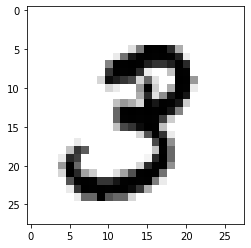

In [ ]:
plt.imshow(X_train[1], cmap="binary")
plt.show()

The labels are classes ranging from 0 to 9

In [ ]:
y_train[:10]

array([7, 3, 4, 6, 1, 8, 1, 0, 9, 8], dtype=uint8)

Let's look at some images from the dataset:

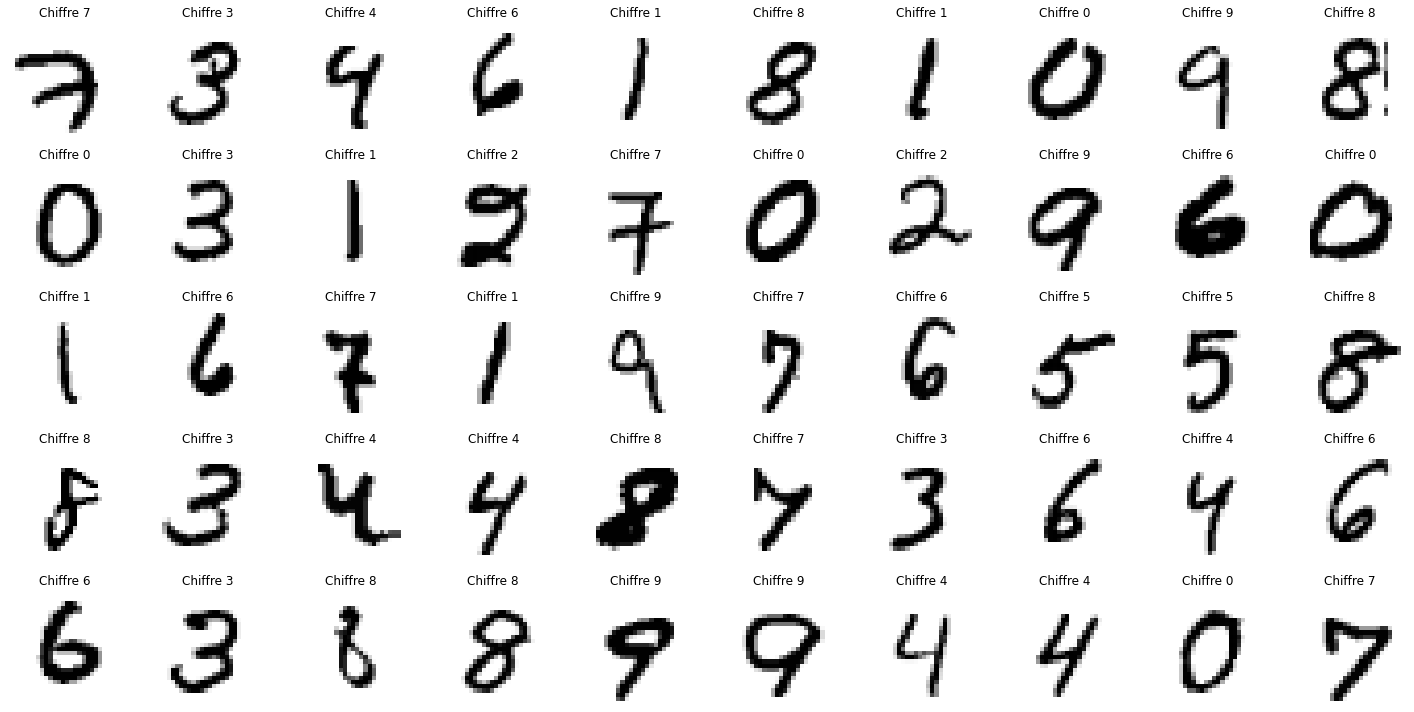

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*2, n_rows*2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index] , cmap="binary")
        plt.axis('off')
        plt.title('Chiffre ' + str(y_train[index]))
plt.tight_layout()
plt.show()

## ◢ 4 Preprocessing
Since the images are in the [grayscale](https://en.wikipedia.org/wiki/Grayscale), the values vary from 0 to 255.

In order to normalize (center) the data, we will implement the Min-Max scaling function in the `normalize_grayscale()` function. After scaling, the pixel values of the input data will range from 0.1 to 0.9.

Min-Max Scaling:
$
X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}
$







<img class="tfo-display-only-on-site" src="images/Mean_Variance_Image.png" height="300"/>

In [ ]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    
    max = image_data.max()
    min = image_data.min()
    return a + (image_data - min)*(b-a)/(max-min)

### CHECK YOUR IMPLEMENTATION WITH THE UNIT TESTS BELOW ###
# Test Cases
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255])),
    [0.1, 0.103137254902, 0.106274509804, 0.109411764706, 0.112549019608, 0.11568627451, 0.118823529412, 0.121960784314,
     0.125098039216, 0.128235294118, 0.13137254902, 0.9],
    decimal=3)
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 10, 20, 30, 40, 233, 244, 254,255])),
    [0.1, 0.103137254902, 0.13137254902, 0.162745098039, 0.194117647059, 0.225490196078, 0.830980392157, 0.865490196078,
     0.896862745098, 0.9])


train_features = normalize_grayscale(X_train)
val_features = normalize_grayscale(X_valid)
test_features = normalize_grayscale(X_test)

print('Tests Passed!')

Tests Passed!


## ◢  5 Building a model 

Building a `Sequential` model with the `keras.models.Sequential` API, with no arguments, and with 3 layers using the `add()` method:
  * A `Flatten` layer (`keras.layers.Flatten`) to convert each 28x28 image size into a simple 784 pixel array. Since this layer is the first one in your model, you must specify the `input_shape` argument.
  * A `Dense` layer (`keras.layers.Dense`) with 50 neurons (also called units), and the activation function `"relu"`.
  * Finally a `Dense` layer with 10 neurons (1 per class), and with the `softmax` activation function to make sure that the sum of all class probabilities estimated for each image is equal to 1.

In [ ]:
# TODO Build the model using add
model = tf.keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

You can also use another annotation.
Instead of using the `add()` method, you can list the layers in the constructor.

In [ ]:
# TODO Build the model by listing the layers in the constructor
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(248,activation = 'relu'),
    keras.layers.Dense(124,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

Use the `layers` attribute of model to display the list of layers

In [ ]:
# TODO Display the list of layers
model.layers

Call the `summary()` method on the model for XXX

In [ ]:
# TODO Summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 50)                39250     
                                                                 
 dense_18 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


## ◢  6 Compiling the model

After creating the model, you need to call the `compile()` method to specify the `loss` function and the `optimizer` to use. 

In this tutorial, we will use the ``sparse_categorical_crossentropy`` cost function, and the following optimizer `keras.optimizers.SGD(learning_rate=0.01)` (stochastic gradient descent with a learning rate of 0.01).

You can also specify a list of additional metrics that can be measured during the learning phase like `metrics=["accuracy"]`. 

**Note**: In the Keras documentation, you can find other cost functions `keras.losses`, other metrics `keras.metrics` and other optimizers `keras.optimizer`.

In [ ]:
# TODO Compilation
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

## ◢  7 Training the model

Your model is now ready to be trained. Call the `fit()` method, passing the input parameters (`train_features`) and the values to predict (`y_train`).

Set:
- the number of epochs `epochs=5`
- the validation data `validation_data=(val_features, y_valid)`

**Note**: The `fit()` method returns a `History` object which contains the training statistics. Don't forget to get this object (`history = model.fit(...)`).

In [ ]:
# TODO Fit
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0.001, 
                                patience=2, 
                                verbose=0, 
                                mode='auto', 
                                baseline=None, 
                                restore_best_weights=False)
]


model.fit(train_features,y_train,epochs=10,validation_data=(val_features, y_valid),callbacks=callbacks)

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8081 - accuracy: 0.8007 - val_loss: 0.4244 - val_accuracy: 0.8950
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3940 - accuracy: 0.8914 - val_loss: 0.3407 - val_accuracy: 0.9082
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3412 - accuracy: 0.9037 - val_loss: 0.3100 - val_accuracy: 0.9144
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.9104 - val_loss: 0.2872 - val_accuracy: 0.9192
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2968 - accuracy: 0.9160 - val_loss: 0.2720 - val_accuracy: 0.9234
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.9203 - val_loss: 0.2599 - val_accuracy: 0.9276
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2692 - accuracy: 0.9241 - val_loss: 0.2492 - val_accuracy:

Let's look at the values of the cost function and the accuracy on the 2 data sets (train and validation)

In [ ]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

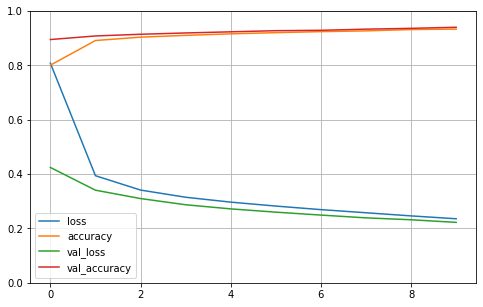

In [ ]:
# TODO Plot of history
plot_learning_curves(model.history)

Rerun `model.fit()` with 3 epochs, what happens?

In [ ]:
# TODO Fit
model.fit(train_features,y_train,epochs=3,validation_data=(val_features, y_valid))

Epoch 1/3
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2254 - accuracy: 0.9367 - val_loss: 0.2111 - val_accuracy: 0.9430
Epoch 2/3
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2160 - accuracy: 0.9399 - val_loss: 0.2050 - val_accuracy: 0.9438
Epoch 3/3
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2074 - accuracy: 0.9419 - val_loss: 0.1992 - val_accuracy: 0.9480


## ◢ 8 Model evaluation

Call the `evaluate()` method on the previously created model on the test set (`test_features` and `y_test`). This method will compute the cost function (in this case cross-entropy) on the test set, as well as the additional metrics (in this case, accuracy). 

Your model must reach an accuracy of more than 90% on the test set.

In [ ]:
# TODO Evaluate
model.evaluate(test_features,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2037 - accuracy: 0.9417


[0.20369940996170044, 0.9416999816894531]

## ◢ 9 Prediction

Call the `predict()` method on the model to estimate the probability of each class for each instance (for better readability, use the `round()` method on the generated probabilities):

In [ ]:
# TODO Predict + Round
y_proba = np.round_(model.predict(test_features),4)

313/313 [==============================] - 0s 1ms/step


In [ ]:
print(y_proba[0])

[0.000e+00 0.000e+00 2.000e-04 1.100e-03 0.000e+00 0.000e+00 0.000e+00
 9.985e-01 0.000e+00 1.000e-04]


From the probabilities of the different values, let's deduce the predicted value (the one with the maximum % => use the `argmax` function)

In [ ]:
# TODO Argmax
y_pred = np.argmax(y_proba,axis=1) # axis=1 pour travailler sur chaque ligne

In [ ]:
print(y_pred)

[7 2 1 ... 4 5 6]


## ◢ 10 Prediction visualization

Utility methods to display an image and a bar chart representing the probability of predictions for each number from 0 to 9 (predictions in blue are the correct predictions and in red those incorrect)

In [ ]:
def plot_prediction_image(predictions_array, true_label, img):

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Chiffre prédit {} {:2.0f}% ({})".format(predicted_label,
                                                        np.max(predictions_array) *100,
                                                        true_label),
                                                        color=color)
    
def plot_prediction_bar_chart(predictions_array, true_label, img):
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    plt.grid(False)
    plt.xticks(range(10))
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Display of the image to be predicted and the probability of predictions for each digit from 0 to 9 for the first image

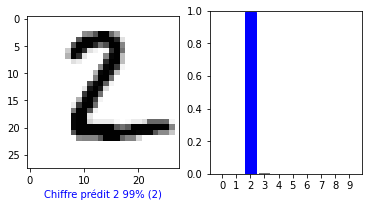

In [ ]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_prediction_image(y_proba[i], y_test[i], X_test[i])
plt.subplot(1,2,2)
plot_prediction_bar_chart(y_proba[i], y_test[i], X_test[i])
plt.show()

### 10-1 Let's display the first 20 numbers and see the predictions


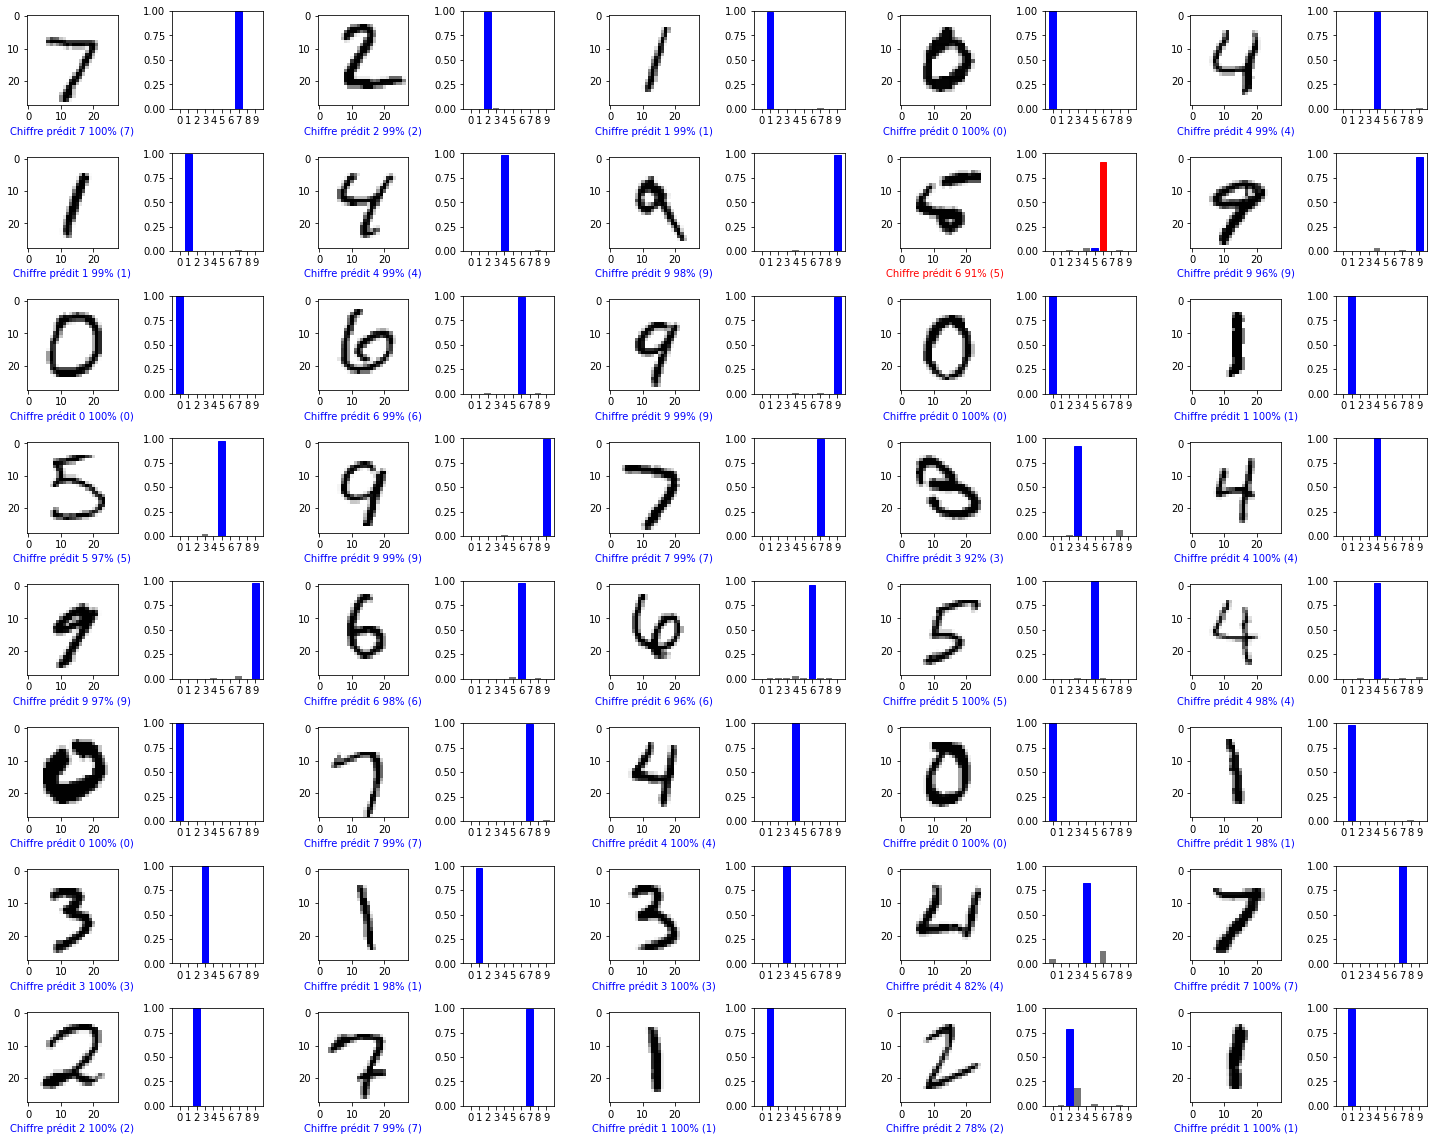

In [ ]:
num_rows = 8
num_cols = 5
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(y_proba[index], y_test[index], X_test[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(y_proba[index], y_test[index], X_test[index])
plt.tight_layout()
plt.show()



### 10-2 Focus on mispredicted images

In [ ]:
y_proba_false = y_proba[y_pred != y_test]
y_test_false = y_test[y_pred != y_test]
X_test_false = X_test[y_pred != y_test]

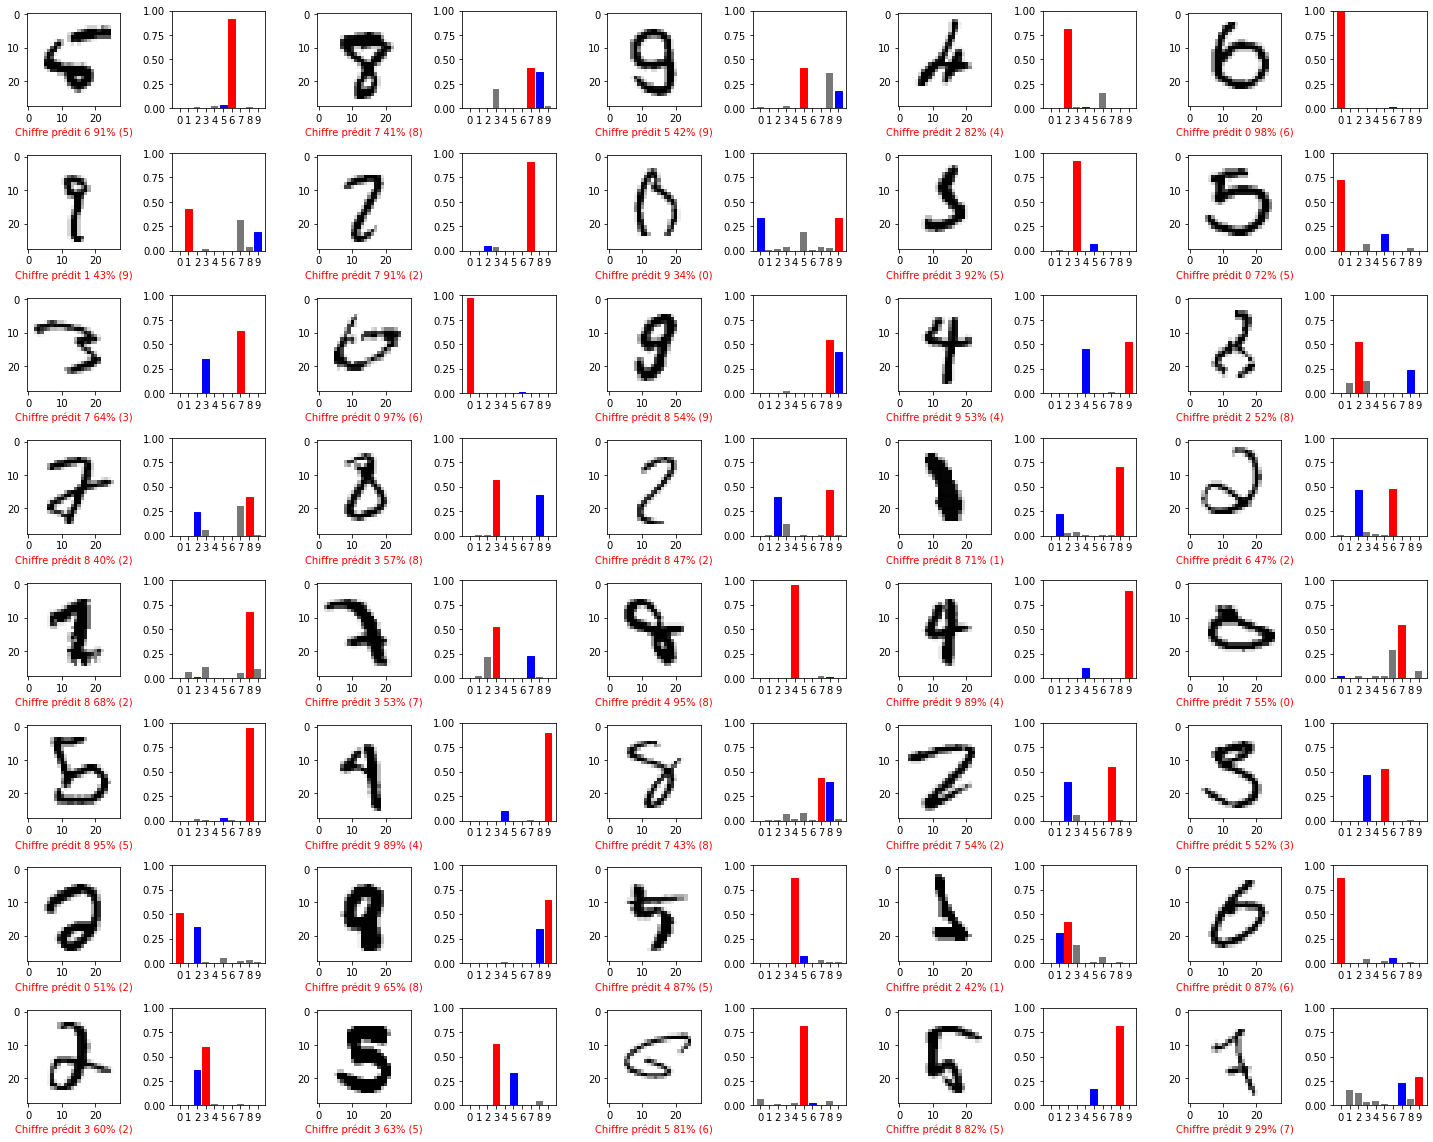

In [ ]:
num_rows = 8
num_cols = 5
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(y_proba_false[index], y_test_false[index], X_test_false[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(y_proba_false[index], y_test_false[index], X_test_false[index])
plt.tight_layout()
plt.show()